In [78]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install seaborn as sns

You are using pip version 18.0, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [79]:
player_stats = pd.read_csv("player_stats_data.csv", index_col=0)
player_stats.rename(columns={'PLAYER':'Player'}, inplace=True)
player_stats.head()

,Player,G,GLS,GPG,AST,APG,BLK,BPG,+ / -,+/- PG,CMP,CPG,CMP %,PP,PPG
0,Quentin Bonnaud,12,83,6.92,15,1.25,14,1.17,101,8.42,208,17.33,96.3,284,23.67
1,Rowan McDonnell,13,67,5.15,51,3.92,5,0.38,92,7.08,408,31.38,93.8,359,27.62
2,Ben Jagt,15,67,4.47,64,4.27,14,0.93,111,7.40,287,19.13,91.4,379,25.27
3,Max Sheppard,14,61,4.36,68,4.86,9,0.64,103,7.36,295,21.07,91.0,337,24.07
4,Eli Jaime,10,52,5.20,12,1.20,4,0.40,61,6.10,101,10.10,95.3,211,21.10


In [143]:
team_stats = pd.read_csv("team_stats.csv", index_col=0)
team_stats.head()

,Team,G,W,L,T,PTS,PPG,PA,PAPG,OEFF,DEFF,+ / -,+/- PG,BLK,BPG,CMP,CPG,CMP %,TO,TPG
0,New York Empire,15,15,0,0,334,22.27,282,18.80,0.48,-0.42,588,39.20,150,10.00,"3,547",236.47,94.7,230,15.33
1,San Diego Growlers,14,11,3,0,328,23.43,292,20.86,0.46,-0.42,581,41.50,157,11.21,"3,404",243.14,94.8,228,16.29
2,Raleigh Flyers,13,10,3,0,293,22.54,255,19.62,0.39,-0.36,514,39.54,124,9.54,"3,197",245.92,95.0,192,14.77
3,Dallas Roughnecks,15,10,5,0,320,21.33,300,20.00,0.32,-0.41,550,36.67,202,13.47,"3,640",242.67,93.7,290,19.33
4,Pittsburgh Thunderbirds,14,9,5,0,298,21.29,270,19.29,0.33,-0.41,487,34.79,141,10.07,"3,551",253.64,94.5,249,17.79


In [81]:
rosters = pd.read_csv("rosters.csv", index_col=0)
rosters.head()

,Player,Team
0,Sam Batson,hustle
1,Sun Choi,hustle
2,Karl Ekwurtzel,hustle
3,Brett Hulsmeyer,hustle
4,Elijah Jaime,hustle


In [82]:
data = rosters.merge(player_stats, left_on='Player', right_on='Player')
data.drop_duplicates(inplace=True)
data.head()

,Player,Team,G,GLS,GPG,AST,APG,BLK,BPG,+ / -,+/- PG,CMP,CPG,CMP %,PP,PPG
0,Sam Batson,hustle,8,0,0.00,4,0.50,3,0.38,4,0.50,24,3.00,88.9,67,8.38
1,Sun Choi,hustle,10,2,0.20,10,1.00,3,0.30,6,0.60,90,9.00,90.9,132,13.20
2,Karl Ekwurtzel,hustle,9,4,0.44,1,0.11,4,0.44,2,0.22,44,4.89,86.3,121,13.44
3,Brett Hulsmeyer,hustle,10,8,0.80,1,0.10,12,1.20,18,1.80,38,3.80,92.7,179,17.90
4,Matthew Knowles,hustle,7,0,0.00,13,1.86,0,0.00,7,1.00,117,16.71,95.1,108,15.43


In [83]:
from sklearn.linear_model import LinearRegression

comparing APG and BPG
0.0993516545055858


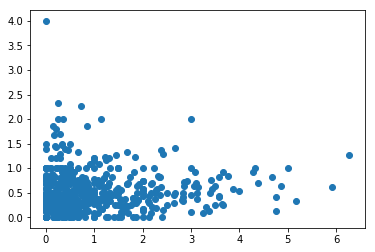

comparing total assists and blocks
0.27818694520947446


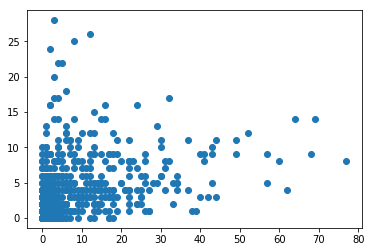

In [84]:
print('comparing APG and BPG')
print(np.corrcoef(data['APG'], data['BPG'])[0][1])
plt.scatter(data['APG'], data['BPG'])
plt.show()
print('comparing total assists and blocks')
print(np.corrcoef(data['AST'], data['BLK'])[0][1])
plt.scatter(data['AST'], data['BLK'])
plt.show()

In [85]:
ast_blk_model = LinearRegression()
ast_blk_model.fit(data[['AST']], data['BLK'])
print('assists and blocks.','slope:',ast_blk_model.coef_[0],'intercept:', ast_blk_model.intercept_)

assists and blocks. slope: 0.09873211752321828 intercept: 3.481292273008372


In [86]:
apg_bpg_model = LinearRegression()
apg_bpg_model.fit(data[['APG']], data['BPG'])
print('assists per game and blocks per game.','slope:',apg_bpg_model.coef_[0],'intercept:', apg_bpg_model.intercept_)

assists per game and blocks per game. slope: 0.039896996496095245 intercept: 0.45488145335483965


goals per game and blocks per game
0.17893315388829215


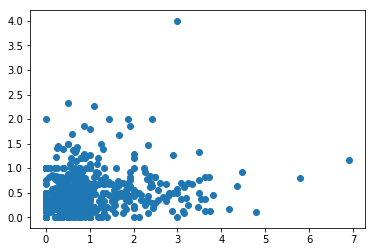

goals and blocks
0.3308606494558494


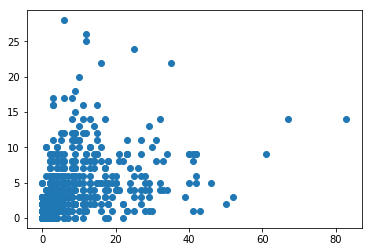

In [87]:
print('goals per game and blocks per game')
print(np.corrcoef(data['GPG'], data['BPG'])[0][1])
plt.scatter(data['GPG'], data['BPG'])
plt.show()
print('goals and blocks')
print(np.corrcoef(data['GLS'], data['BLK'])[0][1])
plt.scatter(data['GLS'], data['BLK'])
plt.show()

In [88]:
gpg_bpg_model = LinearRegression()
gpg_bpg_model.fit(data[['GPG']], data['BPG'])
print('goals per game and blocks per game.','slope:',gpg_bpg_model.coef_[0],'intercept:', gpg_bpg_model.intercept_)

goals per game and blocks per game. slope: 0.08029050819657213 intercept: 0.41676621266429814


In [89]:
gls_blk_model = LinearRegression()
gls_blk_model.fit(data[['GLS']], data['BLK'])
print('goals and blocks.','slope:',gls_blk_model.coef_[0],'intercept:', gls_blk_model.intercept_)

goals and blocks. slope: 0.13230847952242464 intercept: 3.192531558413319


In [150]:
filtered_data = data.loc[data['PP'] > 200]
print(len(data.index))
print(len(filtered_data.index))

553
141


goals and blocks with more than 200 points played -0.025042656235391342


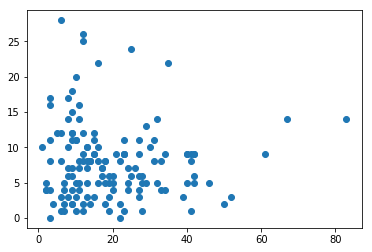

assists and blocks with more than 200 points played -0.11100010535819885


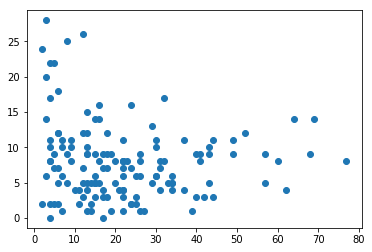

In [91]:
print('goals and blocks with more than 200 points played',np.corrcoef(filtered_data['GLS'], filtered_data['BLK'])[0][1])
plt.scatter(filtered_data['GLS'], filtered_data['BLK'])
plt.show()
print('assists and blocks with more than 200 points played',np.corrcoef(filtered_data['AST'], filtered_data['BLK'])[0][1])
plt.scatter(filtered_data['AST'], filtered_data['BLK'])
plt.show()

goals and blocks with less than 200 points played 0.22699293980663593


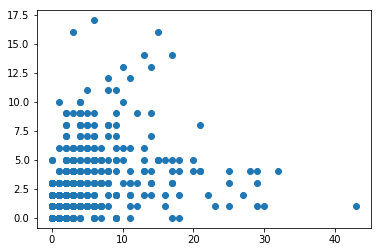

assists and blocks with less than 200 points played 0.10529842067810444


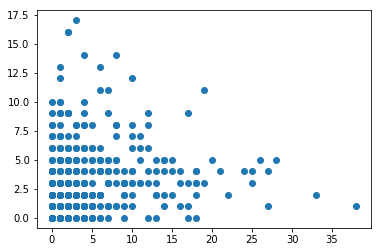

In [152]:
less_than_200_data = data.loc[data['PP'] < 200]
print('goals and blocks with less than 200 points played',np.corrcoef(less_than_200_data['GLS'], less_than_200_data['BLK'])[0][1])
plt.scatter(less_than_200_data['GLS'], less_than_200_data['BLK'])
plt.show()
print('assists and blocks with less than 200 points played',np.corrcoef(less_than_200_data['AST'], less_than_200_data['BLK'])[0][1])
plt.scatter(less_than_200_data['AST'], less_than_200_data['BLK'])
plt.show()

In [92]:
data.rename(columns={'+ / -':'plus_minus'}, inplace=True)
data.sort_values(by=['plus_minus'], inplace=True, ascending = False)
teams_names = {}
teams_pmt = {}
data.head()
for team_name in data.Team.unique():
    team_leaders_list = []
    plus_minus_total = 0
    temp_df = data.loc[data['Team'] == team_name]
    for x in range(0,3):
        entry = temp_df.iloc[x]
        team_leaders_list.append(entry['Player'])
        plus_minus_total += entry['plus_minus']
    teams_pmt[team_name] = plus_minus_total
    team_leaders[team_name] = team_leaders_list
print(team_leaders)
print(teams_pmt)


{'empire': ['Ben Jagt', 'Conor Kline', 'Jeff Babbitt'], 'thunderbirds': ['Max Sheppard', 'Thomas Edmonds', 'Jimmy Towle'], 'royal': ['Quentin Bonnaud', 'Kevin Quinlan', 'Sacha Poitte- Sokolsky'], 'growlers': ['Travis Dunn', 'Jonathan Helton', 'Sean Ham'], 'aviators': ['Sean McDougall', 'Joc Jimenez', 'Danny Landesman'], 'wildfire': ['Pawel Janas', 'Drew Swanson', 'Jack Shanahan'], 'roughnecks': ['Carson Wilder', 'Abe Coffin', 'Jay Froude'], 'flyers': ['Jacob Fairfax', 'Henry Fisher', 'Terrence Mitchell'], 'alleycats': ['Rick Gross', 'Keegan North', 'Levi Jacobs'], 'cascades': ['Jay Boychuk', 'Khalif El-Salaam', 'Zach Sabin'], 'rush': ['Cameron Harris', 'Nathan Hirst', 'Andrew Carroll'], 'windchill': ['Bryan Vohnoutka', 'Quinn Snider', 'Josh Klane'], 'outlaws': ['Alec Arsenault', 'Karl Loiseau', 'Jeremy Hill'], 'cannons': ['Bradley Seuntjens', 'Andrew Roney', 'Tanner Repasky'], 'hustle': ['Matt Smith', 'Christian Olsen', 'Will Lindquist'], 'spiders': ['Keenan Laurence', 'Lior Givol', 'M

In [144]:
# team_stats.assign(top_three_pm = np.zeros(len(team_stats.index)))
# team_stats.insert(3, "top_three_pm", np.zeros(len(team_stats.index)), True)
pm_list = []
for team in team_stats['Team']:
    words = team.split()
    team_stats.replace(to_replace=team, value=words[-1].lower(), inplace=True)
team_stats.replace(to_replace='chill', value='windchill', inplace=True)
for team in team_stats['Team']:
    pm_list.append(teams_pmt[team])
team_stats.insert(3, "top_three_pm", pm_list, True)

comparing Wins and the combined plus minus of each team's best three players
0.7999786670982608


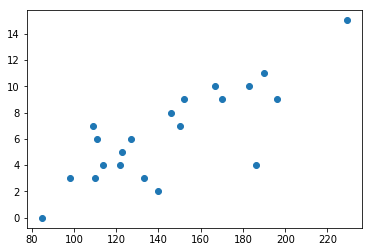

In [146]:
print('comparing Wins and the combined plus minus of each team\'s best three players')
print(np.corrcoef(team_stats['top_three_pm'], team_stats['W'])[0][1])
plt.scatter(team_stats['top_three_pm'], team_stats['W'])
plt.show()
# pm_w_model = LinearRegression()
# pm_w_model.fit(team_stats[['top_three_pm']], team_stats['W'])
# print('goals and blocks.','slope:',pm_w_model.coef_[0],'intercept:', pm_w_model.intercept_)

In [147]:
team_stats.sort_values(by=['top_three_pm'], inplace=True, ascending = False)
print(team_stats)

            Team   G   W  top_three_pm   L  T  PTS    PPG   PA   PAPG  ...    \
0         empire  15  15           229   0  0  334  22.27  282  18.80  ...     
4   thunderbirds  14   9           196   5  0  298  21.29  270  19.29  ...     
1       growlers  14  11           190   3  0  328  23.43  292  20.86  ...     
14         royal  12   4           186   8  0  238  19.83  253  21.08  ...     
3     roughnecks  15  10           183   5  0  320  21.33  300  20.00  ...     
6       aviators  13   9           170   4  0  306  23.54  267  20.54  ...     
2         flyers  13  10           167   3  0  293  22.54  255  19.62  ...     
5      alleycats  14   9           152   5  0  280  20.00  270  19.29  ...     
8       wildfire  13   7           150   6  0  271  20.85  257  19.77  ...     
7           rush  14   8           146   6  0  293  20.93  271  19.36  ...     
19      cascades  12   2           140  10  0  263  21.92  306  25.50  ...     
18       outlaws  12   3           133  